In [1276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

In [1277]:
df = pd.read_csv('data_table1-3.csv')

In [1278]:
df.head()

,household_code,fruit_paid,vege_paid,ln_fruit_paid,ln_vege_paid,super5_cat,con5_10,regional_10000,dest5_10,mix5_10,...,income,race,hh_size,age,marital_status,children,employed_new,urban,msa,zip
0,1,166.260000,148.790000,5.113553,5.002536,1,0.2,1.548161,27.9,2.966195,...,3,2,4,2,1,1,0,1,44140,1002
1,2,14.030000,39.890000,2.641198,3.686126,1,0.2,1.548161,27.9,2.966195,...,2,4,1,2,4,1,0,1,44140,1002
2,3,245.490000,425.100000,5.503256,6.052324,1,0.2,1.548161,27.9,2.966195,...,3,3,2,3,1,1,0,1,44140,1002
3,4,9.720000,142.570000,2.274186,4.959833,1,0.1,0.876350,4.4,3.988298,...,2,1,2,3,1,1,0,3,49340,1005
4,5,330.579999,480.969999,5.800848,6.175805,0,0.1,1.972699,1.3,5.618377,...,1,1,4,1,1,0,0,3,44140,1010


In [1279]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22448 entries, 0 to 22447
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   household_code  22448 non-null  int64  
 1   fruit_paid      22448 non-null  float64
 2   vege_paid       22448 non-null  float64
 3   ln_fruit_paid   22310 non-null  float64
 4   ln_vege_paid    22334 non-null  float64
 5   super5_cat      22448 non-null  int64  
 6   con5_10         22448 non-null  float64
 7   regional_10000  22448 non-null  float64
 8   dest5_10        22448 non-null  float64
 9   mix5_10         22448 non-null  float64
 10  design5_10      22448 non-null  float64
 11  auto_bg100      22448 non-null  float64
 12  poverty_tr100   22448 non-null  float64
 13  edu             22448 non-null  int64  
 14  income          22448 non-null  int64  
 15  race            22448 non-null  int64  
 16  hh_size         22448 non-null  int64  
 17  age             22448 non-null 

In [1280]:
df.describe()

,household_code,fruit_paid,vege_paid,ln_fruit_paid,ln_vege_paid,super5_cat,con5_10,regional_10000,dest5_10,mix5_10,...,income,race,hh_size,age,marital_status,children,employed_new,urban,msa,zip
count,22448.000000,22448.000000,22448.000000,22310.000000,22334.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,...,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000
mean,11224.500000,133.700733,135.791781,4.452355,4.525334,0.635157,1.212745,9.637722,79.395171,4.782741,...,2.502762,1.285504,2.380613,2.474252,1.798156,0.733696,0.168389,1.789558,30019.400837,48539.278377
std,6480.323757,124.415704,118.907040,1.077241,0.991359,0.825646,1.762062,11.980695,225.274572,1.951837,...,0.640819,0.728693,1.042938,0.761573,1.159419,0.442035,0.443919,0.955971,11065.301184,28501.772390
min,1.000000,0.000000,0.000000,-2.302585,-2.302585,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,10180.000000,1002.000000
25%,5612.750000,46.957499,53.017500,3.868802,3.985831,0.000000,0.200000,2.287601,6.100000,3.623594,...,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,19100.000000,26003.000000
50%,11224.500000,99.035000,104.165000,4.602768,4.651481,0.000000,0.600000,5.864709,29.700001,5.035609,...,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,31140.000000,45431.000000
75%,16836.250000,180.362498,182.600000,5.199146,5.209882,1.000000,1.600000,12.270072,80.500000,6.244552,...,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,0.000000,3.000000,38900.000000,75023.250000
max,22448.000000,1631.569999,1660.030002,7.397298,7.414591,2.000000,17.900000,136.262620,4579.899900,9.999999,...,3.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,3.000000,49740.000000,99403.000000


### drop logarithmic transformed values

In [1281]:
df.drop(['ln_fruit_paid', 'ln_vege_paid'], axis=1, inplace=True)

#### Create total expenditure variable

In [1282]:
df.insert(loc = 3, column='total expenditure', value= df['fruit_paid'] + df['vege_paid'])
df.drop(columns=['fruit_paid','vege_paid'], inplace=True)

#### Drop age

In [1283]:
df.drop(['age'], axis=1, inplace=True)

### Convert category integers with original string values

In [1284]:
categorical = ['edu','income','race','marital_status','urban']
df[categorical].sample(10)

,edu,income,race,marital_status,urban
14840,2,2,2,1,1
14458,2,3,1,3,1
7244,1,1,1,3,3
439,2,3,1,1,1
19759,1,3,4,1,1
13093,1,3,1,1,3
12368,2,3,1,1,1
1424,1,3,1,1,1
15002,3,2,1,4,1
16345,2,2,1,4,1


In [1285]:
# Education
df['edu'].replace({1:'high school or below', 2:'college or higher', 3:'no female head'}, inplace=True)

# Income
df['income'].replace({1:'below 20000', 2:'20000-59999', 3:'60000+'}, inplace=True)

# Race
df['race'].replace({1:'white', 2:'black', 3:'asian', 4:'other'}, inplace=True)

# Marital Status
df['marital_status'].replace({1:'married', 2:'widowed', 3:'divorced', 4:'seprated/single'}, inplace=True)

# Urban
df['urban'].replace({1:'urbanized area', 2:'urban cluster', 3:'non-urban'}, inplace=True)

df[['edu','income','race','marital_status','urban']].sample(10)

,edu,income,race,marital_status,urban
11730,high school or below,60000+,white,married,non-urban
3033,college or higher,60000+,white,seprated/single,urbanized area
541,college or higher,60000+,white,married,non-urban
218,college or higher,60000+,white,married,urbanized area
2527,college or higher,60000+,white,married,urbanized area
14984,college or higher,20000-59999,white,seprated/single,urban cluster
6823,college or higher,60000+,black,married,non-urban
2010,high school or below,60000+,white,married,non-urban
21191,college or higher,20000-59999,white,divorced,urbanized area
19812,no female head,60000+,white,seprated/single,urbanized area


In [1286]:
df.head()

,household_code,total expenditure,super5_cat,con5_10,regional_10000,dest5_10,mix5_10,design5_10,auto_bg100,poverty_tr100,edu,income,race,hh_size,marital_status,children,employed_new,urban,msa,zip
0,1,315.050000,1,0.2,1.548161,27.9,2.966195,0.701796,4.280881,6.0,college or higher,60000+,black,4,married,1,0,urbanized area,44140,1002
1,2,53.920000,1,0.2,1.548161,27.9,2.966195,0.701796,4.280881,6.0,college or higher,20000-59999,other,1,seprated/single,1,0,urbanized area,44140,1002
2,3,670.590000,1,0.2,1.548161,27.9,2.966195,0.701796,4.280881,6.0,college or higher,60000+,asian,2,married,1,0,urbanized area,44140,1002
3,4,152.290000,1,0.1,0.876350,4.4,3.988298,0.350448,1.084848,6.8,high school or below,20000-59999,white,2,married,1,0,non-urban,49340,1005
4,5,811.549998,0,0.1,1.972699,1.3,5.618377,0.207541,3.781913,1.2,college or higher,below 20000,white,4,married,0,0,non-urban,44140,1010


In [1287]:
cont = ['total expenditure', 'super5_cat', 'con5_10', 'regional_10000', 'dest5_10', 'mix5_10',
        'design5_10', 'auto_bg100', 'poverty_tr100', 'hh_size', 'employed_new']

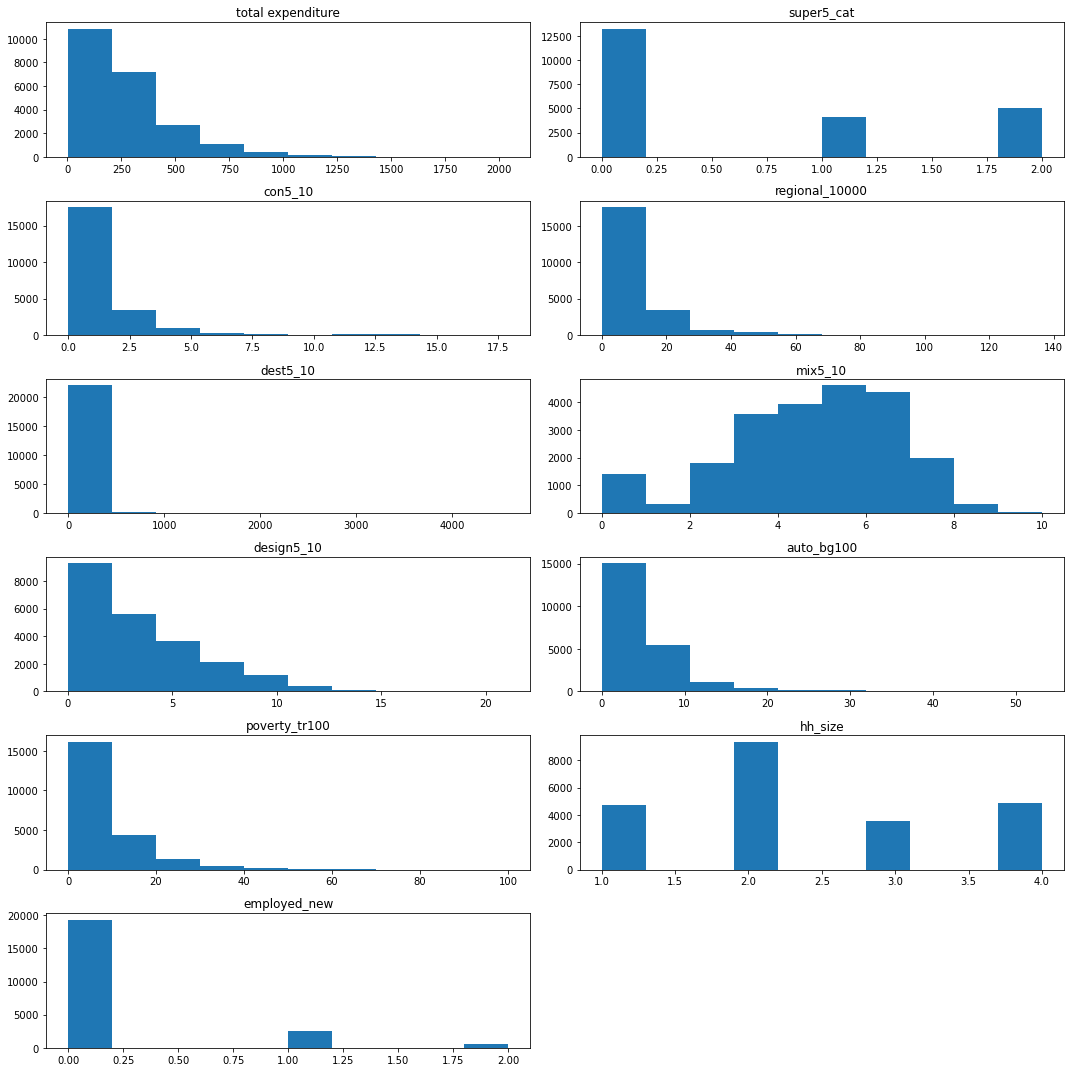

In [1288]:
plt.figure(figsize=(15,15))

i = 1

for var in cont:
    plt.subplot(6, 2, i)
    plt.hist(df[var])
    plt.title(var)
    i += 1
    
plt.tight_layout();

In [1289]:
skewed = ['total expenditure', 'con5_10', 'dest5_10', 'design5_10', 'auto_bg100', 'poverty_tr100']
df[skewed].describe()

,total expenditure,con5_10,dest5_10,design5_10,auto_bg100,poverty_tr100
count,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000
mean,269.492514,1.212745,79.395171,3.504114,5.274513,8.191603
std,212.975075,1.762062,225.274572,2.984836,5.283661,8.355719
min,2.700000,0.000000,0.000000,0.002138,0.000000,0.000000
25%,116.672500,0.200000,6.100000,1.049608,2.348587,2.600000
50%,214.054999,0.600000,29.700001,2.746177,3.872927,5.600000
75%,359.780001,1.600000,80.500000,5.236800,6.320229,10.900000
max,2040.580002,17.900000,4579.899900,21.072227,53.180000,100.000000


In [1290]:
#df['total expenditure'] = np.log(df['total expenditure'])

In [1291]:
df[skewed].describe()

,total expenditure,con5_10,dest5_10,design5_10,auto_bg100,poverty_tr100
count,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000
mean,269.492514,1.212745,79.395171,3.504114,5.274513,8.191603
std,212.975075,1.762062,225.274572,2.984836,5.283661,8.355719
min,2.700000,0.000000,0.000000,0.002138,0.000000,0.000000
25%,116.672500,0.200000,6.100000,1.049608,2.348587,2.600000
50%,214.054999,0.600000,29.700001,2.746177,3.872927,5.600000
75%,359.780001,1.600000,80.500000,5.236800,6.320229,10.900000
max,2040.580002,17.900000,4579.899900,21.072227,53.180000,100.000000


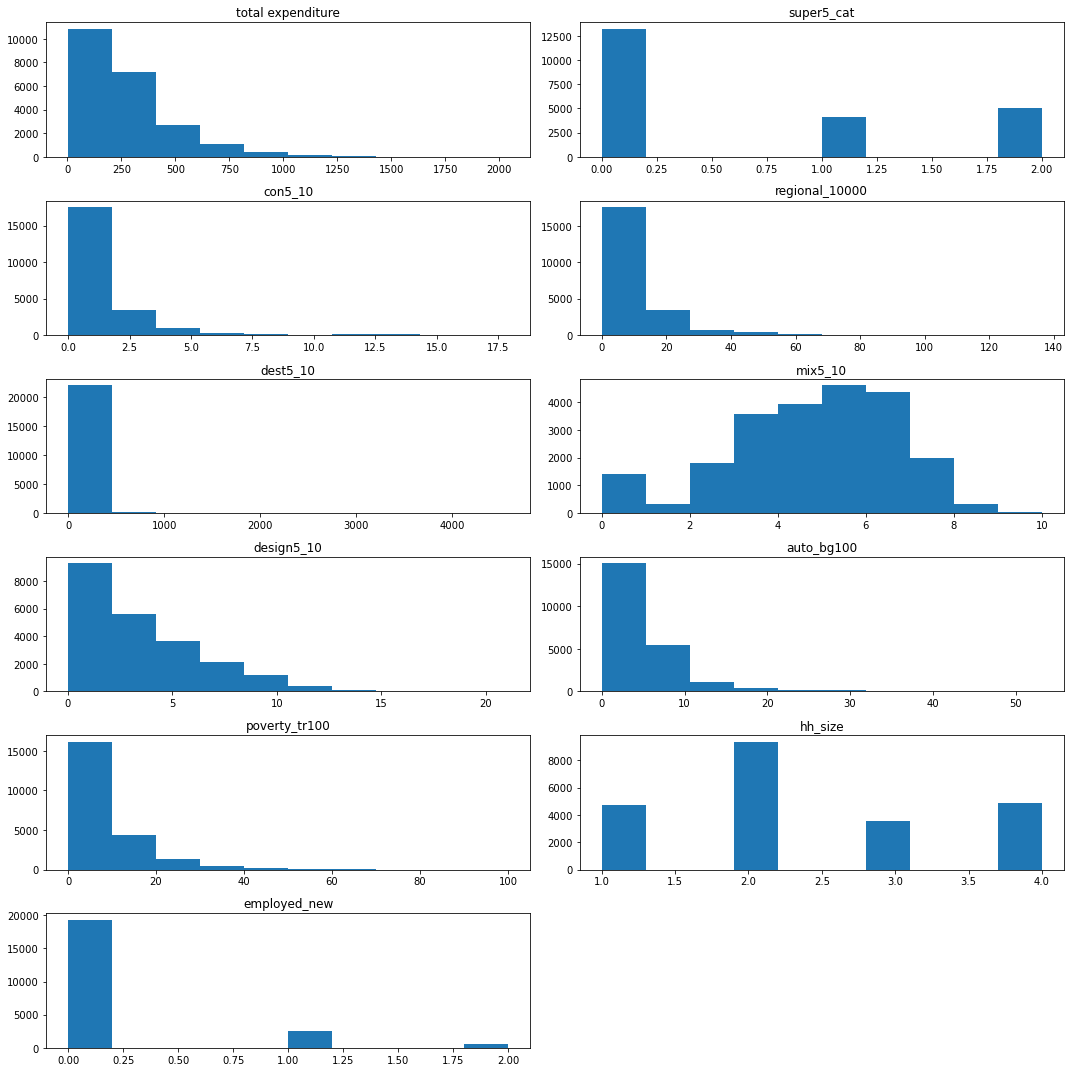

In [1292]:
plt.figure(figsize=(15,15))

i = 1

for var in cont:
    plt.subplot(6, 2, i)
    plt.hist(df[var])
    plt.title(var)
    i += 1
    
plt.tight_layout();

In [1293]:
variables = ['edu','income','race','marital_status','urban']

for var in variables:
    df['one hot'] = df[var]
    df = pd.get_dummies(df, columns=['one hot'], prefix= '', prefix_sep='')

In [1294]:
# Group one hot encoded variables into their original category heading
education = ['high school or below', 'college or higher', 'no female head']
income = ['below 20000', '20000-59999', '60000+']
race = ['white', 'black', 'asian', 'other']
marital_status = ['married', 'widowed', 'divorced', 'seprated/single']
urban = ['urbanized area', 'urban cluster', 'non-urban']
one_hot = education + income + race + marital_status + urban

In [1295]:
df.describe()

,household_code,total expenditure,super5_cat,con5_10,regional_10000,dest5_10,mix5_10,design5_10,auto_bg100,poverty_tr100,...,black,other,white,divorced,married,seprated/single,widowed,non-urban,urban cluster,urbanized area
count,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,...,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000
mean,11224.500000,269.492514,0.635157,1.212745,9.637722,79.395171,4.782741,3.504114,5.274513,8.191603,...,0.092703,0.044726,0.833259,0.155203,0.647942,0.145447,0.051408,0.373842,0.041875,0.584284
std,6480.323757,212.975075,0.825646,1.762062,11.980695,225.274572,1.951837,2.984836,5.283661,8.355719,...,0.290022,0.206705,0.372753,0.362106,0.477623,0.352559,0.220833,0.483833,0.200307,0.492856
min,1.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002138,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5612.750000,116.672500,0.000000,0.200000,2.287601,6.100000,3.623594,1.049608,2.348587,2.600000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11224.500000,214.054999,0.000000,0.600000,5.864709,29.700001,5.035609,2.746177,3.872927,5.600000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,16836.250000,359.780001,1.000000,1.600000,12.270072,80.500000,6.244552,5.236800,6.320229,10.900000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,22448.000000,2040.580002,2.000000,17.900000,136.262620,4579.899900,9.999999,21.072227,53.180000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


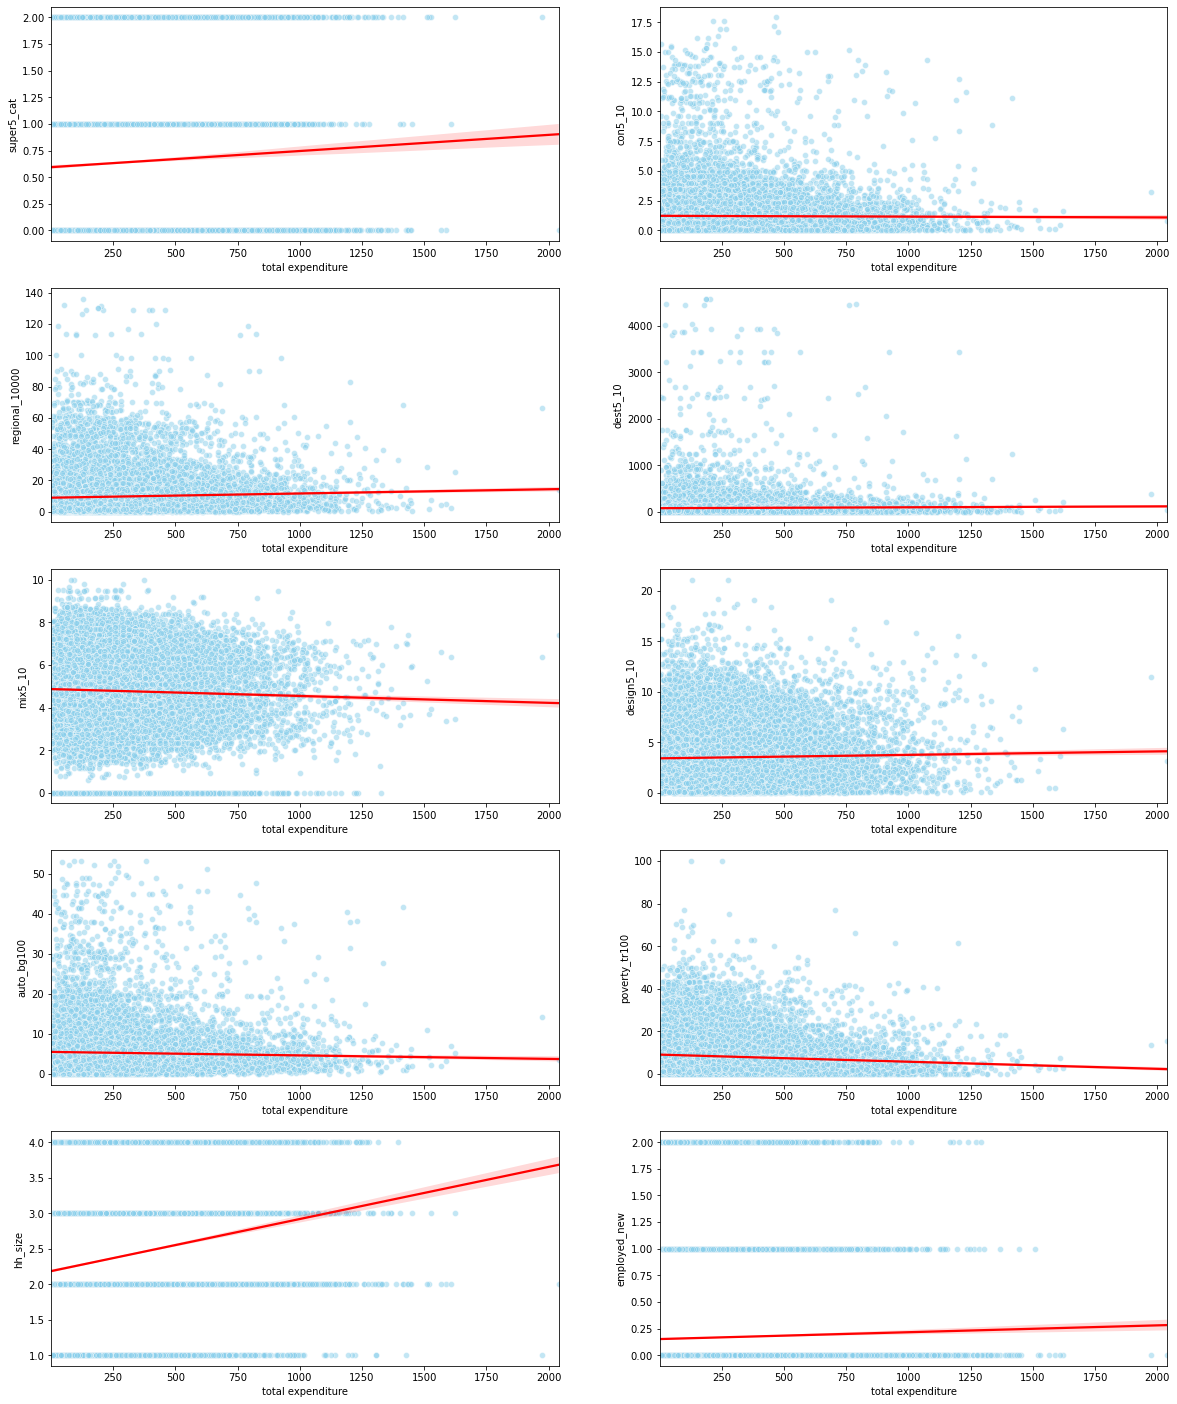

In [1296]:
cont.remove('total expenditure')

plt.figure(figsize=(20,25))

i = 1

for var in cont:
    plt.subplot(5, 2, i)
    sns.scatterplot(data=df, x="total expenditure", y=var, color='skyblue', alpha=.5)
    sns.regplot(data=df, x="total expenditure", y=var, scatter=False, color='r')
    i += 1

In [1297]:
df['intercept'] = 1

all = df.drop(columns = ['household_code', 'total expenditure',] + categorical).columns.tolist()

x = df[all]
y = df['total expenditure']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total expenditure   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     93.94
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:39:31   Log-Likelihood:            -1.5108e+05
No. Observations:               22448   AIC:                         3.022e+05
Df Residuals:                   22422   BIC:                         3.024e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
super5_cat              12.5466      2.243      5.593      0.000       8.150      16.943
con5_10                 -6.6538      1.739     -3.826      0.000     -10.062      -3.245
regional_10000           0.8083      0.192      4.221      0.000       0.433       1.184
dest5_10                 0.0286      0.011      2.676      0.007       0.008       0.050
mix5_10                 -4.3700      0.751     -5.815      0.000      -5.843      -2.897
design5_10               3.3267      0.822      4.045      0.000       1.715       4.939
auto_bg100              -1.0190      0.476     -2.139      0.032      -1.953      -0.085
poverty_tr100           -0.7974      0.185     -4.315      0.000      -1.160      -0.435
hh_size                 20.4289      2.740      7.457      0.000      15.059      25.799
children                41.6245      5.045      8.251      0.000      31.736      51.513
employed_new            -6.2176      3.744     -1.661      0.097     -13.556       1.121
msa                      0.0001      0.000      0.991      0.322      -0.000       0.000
zip                  -6.351e-05   5.32e-05     -1.194      0.233      -0.000    4.08e-05
college or higher       43.6020      2.591     16.831      0.000      38.524      48.680
high school or below    14.0570      3.159      4.450      0.000       7.865      20.249
no female head           4.4293      3.936      1.125      0.260      -3.285      12.144
20000-59999             11.0595      2.674      4.136      0.000       5.818      16.301
60000+                  62.0431      2.735     22.682      0.000      56.682      67.405
below 20000            -11.0143      3.854     -2.858      0.004     -18.568      -3.461
asian                   70.7652      6.567     10.776      0.000      57.893      83.637
black                  -27.7440      4.402     -6.302      0.000     -36.372     -19.115
other                   11.3211      5.522      2.050      0.040       0.498      22.144
white                    7.7460      2.960      2.617      0.009       1.944      13.548
divorced                 2.0636      3.239      0.637      0.524      -4.285       8.412
married                 55.3108      3.576     15.468      0.000      48.302      62.320
seprated/single        -10.5663      3.424     -3.086      0.002     -17.278      -3.854
widowed                 15.2802      4.891      3.124      0.002       5.694      24.867
non-urban               26.0355      2.922      8.910      0.000      20.308      31.763
urban cluster            9.5641      5.084      1.881      0.060      -0.401      19.529
urbanized area          26.4886      3.020      8.771      0.000      20.569      32.408
intercept               62.0883      4.441     13.981      0.000      53.384      70.793
=========================================================

In [1298]:
pvalues = pd.DataFrame(model.pvalues, columns =['pvalue']).reset_index().rename(columns={'index':'variable'})
tvalues = pd.DataFrame(model.tvalues, columns =['tvalue']).reset_index().rename(columns={'index':'variable'})
key_vals = pvalues.merge(tvalues, how='inner', on='variable')
key_vals = key_vals[key_vals['pvalue'] < 0.05]
key_vals = key_vals[key_vals['tvalue'] > 0]
reduce_vals = key_vals['variable'].tolist()
print(reduce_vals)

['super5_cat', 'regional_10000', 'dest5_10', 'design5_10', 'hh_size', 'children', 'college or higher', 'high school or below', '20000-59999', '60000+', 'asian', 'other', 'white', 'married', 'widowed', 'non-urban', 'urbanized area', 'intercept']


In [1299]:
x = pd.DataFrame(df[reduce_vals])
y = pd.DataFrame(df[['total expenditure']])

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total expenditure   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     129.8
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:39:31   Log-Likelihood:            -1.5115e+05
No. Observations:               22448   AIC:                         3.023e+05
Df Residuals:                   22430   BIC:                         3.025e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
super5_cat              11.3777      2.195      5.182      0.000       7.074      15.681
regional_10000           0.6246      0.185      3.378      0.001       0.262       0.987
dest5_10                 0.0025      0.008      0.311      0.756      -0.013       0.018
design5_10               0.2448      0.720      0.340      0.734      -1.167       1.657
hh_size                 17.6703      2.255      7.838      0.000      13.251      22.089
children                37.2057      4.606      8.078      0.000      28.178      46.234
college or higher       42.3817      5.367      7.897      0.000      31.863      52.901
high school or below    11.4150      5.981      1.909      0.056      -0.308      23.138
20000-59999             23.7659      5.403      4.399      0.000      13.176      34.355
60000+                  77.5020      5.437     14.255      0.000      66.845      88.159
asian                  106.2952      9.173     11.588      0.000      88.315     124.275
other                   42.6669      7.852      5.434      0.000      27.277      58.057
white                   42.2289      4.812      8.776      0.000      32.797      51.660
married                 61.1423      3.941     15.514      0.000      53.418      68.867
widowed                 19.2471      6.531      2.947      0.003       6.445      32.049
non-urban               20.3035      7.031      2.888      0.004       6.523      34.084
urbanized area          21.1812      7.160      2.958      0.003       7.147      35.216
intercept                0.3187     12.177      0.026      0.979     -23.549      24.186
==============================================================================
Omnibus:                     6909.366   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22359.095
Skew:                           1.574   Prob(JB):                         0.00
Kurtosis:                       6.742   Cond. No.                     2.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1300]:
pvalues = pd.DataFrame(model.pvalues, columns =['pvalue']).reset_index().rename(columns={'index':'variable'})
tvalues = pd.DataFrame(model.tvalues, columns =['tvalue']).reset_index().rename(columns={'index':'variable'})
key_vals = pvalues.merge(tvalues, how='inner', on='variable')
key_vals = key_vals[key_vals['pvalue'] < 0.05]
key_vals = key_vals[key_vals['tvalue'] > 0]
final_vals = key_vals['variable'].tolist()
print(final_vals)

print('')

print('variables removed for final reduction:')

for val in reduce_vals:
    if val not in final_vals:
        print('   - ', val)

['super5_cat', 'regional_10000', 'hh_size', 'children', 'college or higher', '20000-59999', '60000+', 'asian', 'other', 'white', 'married', 'widowed', 'non-urban', 'urbanized area']

variables removed for final reduction:
   -  dest5_10
   -  design5_10
   -  high school or below
   -  intercept


In [1301]:
x = pd.DataFrame(df[final_vals +['intercept']])
y = pd.DataFrame(df[['total expenditure']])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total expenditure   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     123.4
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:39:31   Log-Likelihood:            -1.2107e+05
No. Observations:               17958   AIC:                         2.422e+05
Df Residuals:                   17943   BIC:                         2.423e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
super5_cat           11.0213      2.224      4.955      0.000       6.661      15.381
regional_10000        0.7243      0.155      4.667      0.000       0.420       1.028
hh_size              18.7535      2.518      7.448      0.000      13.818      23.689
children             37.4367      5.176      7.233      0.000      27.291      47.582
college or higher    35.0129      3.393     10.319      0.000      28.362      41.663
20000-59999          22.5427      6.093      3.700      0.000      10.599      34.486
60000+               76.2173      6.104     12.487      0.000      64.254      88.181
asian               100.3165     10.297      9.743      0.000      80.134     120.499
other                40.7231      8.842      4.606      0.000      23.392      58.055
white                41.5944      5.456      7.624      0.000      30.901      52.288
married              61.6528      4.214     14.631      0.000      53.393      69.912
widowed              20.1668      7.268      2.775      0.006       5.921      34.412
non-urban            20.6231      7.924      2.602      0.009       5.091      36.156
urbanized area       22.4350      7.957      2.819      0.005       6.838      38.032
intercept             6.4740     13.237      0.489      0.625     -19.472      32.420
==============================================================================
Omnibus:                     5729.773   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19495.797
Skew:                           1.612   Prob(JB):                         0.00
Kurtosis:                       6.957   Cond. No.                         162.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1302]:
model.summary(alpha=.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total expenditure   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     123.4
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:39:31   Log-Likelihood:            -1.2107e+05
No. Observations:               17958   AIC:                         2.422e+05
Df Residuals:                   17943   BIC:                         2.423e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
super5_cat           11.0213      2.224      4.955      0.000       6.661      15.381
regional_10000        0.7243      0.155      4.667      0.000       0.420       1.028
hh_size              18.7535      2.518      7.448      0.000      13.818      23.689
children             37.4367      5.176      7.233      0.000      27.291      47.582
college or higher    35.0129      3.393     10.319      0.000      28.362      41.663
20000-59999          22.5427      6.093      3.700      0.000      10.599      34.486
60000+               76.2173      6.104     12.487      0.000      64.254      88.181
asian               100.3165     10.297      9.743      0.000      80.134     120.499
other                40.7231      8.842      4.606      0.000      23.392      58.055
white                41.5944      5.456      7.624      0.000      30.901      52.288
married              61.6528      4.214     14.631      0.000      53.393      69.912
widowed              20.1668      7.268      2.775      0.006       5.921      34.412
non-urban            20.6231      7.924      2.602      0.009       5.091      36.156
urbanized area       22.4350      7.957      2.819      0.005       6.838      38.032
intercept             6.4740     13.237      0.489      0.625     -19.472      32.420
==============================================================================
Omnibus:                     5729.773   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19495.797
Skew:                           1.612   Prob(JB):                         0.00
Kurtosis:                       6.957   Cond. No.                         162.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1233]:
df.describe()

,household_code,total expenditure,super5_cat,con5_10,regional_10000,dest5_10,mix5_10,design5_10,auto_bg100,poverty_tr100,...,other,white,divorced,married,seprated/single,widowed,non-urban,urban cluster,urbanized area,intercept
count,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,...,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.0
mean,11224.500000,269.492514,0.635157,1.212745,9.637722,79.395171,4.782741,3.504114,5.274513,8.191603,...,0.044726,0.833259,0.155203,0.647942,0.145447,0.051408,0.373842,0.041875,0.584284,1.0
std,6480.323757,212.975075,0.825646,1.762062,11.980695,225.274572,1.951837,2.984836,5.283661,8.355719,...,0.206705,0.372753,0.362106,0.477623,0.352559,0.220833,0.483833,0.200307,0.492856,0.0
min,1.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002138,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,5612.750000,116.672500,0.000000,0.200000,2.287601,6.100000,3.623594,1.049608,2.348587,2.600000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,11224.500000,214.054999,0.000000,0.600000,5.864709,29.700001,5.035609,2.746177,3.872927,5.600000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
75%,16836.250000,359.780001,1.000000,1.600000,12.270072,80.500000,6.244552,5.236800,6.320229,10.900000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.0
max,22448.000000,2040.580002,2.000000,17.900000,136.262620,4579.899900,9.999999,21.072227,53.180000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [1234]:
zip_only = df.drop(columns= ['household_code', 'msa', 'intercept'] + categorical).columns.tolist()

zip_df = df[zip_only].groupby(['zip']).agg(
    total_expend = ('total expenditure', 'sum' ),
    total_super = ('super5_cat', 'sum' ),
    total_con = ('con5_10', 'sum' ),
    total_jobs = ('regional_10000', 'sum' ),
    total_dest = ('dest5_10', 'sum' ),
    avg_entr = ('mix5_10', 'mean' ),
    avg_auto = ('auto_bg100', 'mean' ),
    avg_pov = ('poverty_tr100', 'mean' ),
    avg_size = ('hh_size', 'mean' ),
    total_children = ('children','sum'),
    avg_employed = ('employed_new','mean'),
    total_college = ('college or higher','sum'),
    total_highsch = ('high school or below','sum'),
    total_nofemale = ('no female head','sum'),
    total_low_inc = ('20000-59999','sum'),
    total_mid_inc = ('60000+','sum'),
    total_high_inc = ('below 20000','sum'),
    total_asian = ('asian','sum'),
    total_black = ('black','sum'),
    total_other = ('other','sum'),
    total_white = ('white','sum'),
    total_divorced = ('divorced','sum'),
    total_married = ('married','sum'),
    total_seperated = ('seprated/single','sum'),
    total_widowed = ('widowed','sum'),
    total_non_urban = ('non-urban','sum'),
    total_urban_clust = ('urban cluster','sum'),
    total_urban_area = ('urbanized area','sum'))


zip_df.sample(10)

,total_expend,total_super,total_con,total_jobs,total_dest,avg_entr,avg_auto,avg_pov,avg_size,total_children,...,total_black,total_other,total_white,total_divorced,total_married,total_seperated,total_widowed,total_non_urban,total_urban_clust,total_urban_area
zip,,,,,,,,,,,,,,,,,,,,,
66013,302.950001,0,0.0,4.103284,0.200000,0.000000,1.028250,6.3,2.000000,1,...,0,0,1,0,1,0,0,1,0,0
36608,925.050001,0,0.4,4.707148,7.200000,8.527926,0.803464,15.6,2.500000,2,...,1,0,2,0,4,0,0,4,0,0
7748,116.430000,0,0.4,9.169925,59.400002,3.582441,4.091128,2.0,4.000000,0,...,0,0,1,0,1,0,0,0,0,1
43140,650.240001,0,0.4,3.962622,14.200000,3.929330,5.588054,12.8,2.000000,1,...,1,0,0,0,1,0,0,0,1,0
60436,888.860001,0,3.0,46.537682,259.200006,4.319660,7.756878,4.4,2.166667,4,...,1,1,4,2,2,2,0,0,0,6
33472,1892.359995,0,1.0,36.234067,299.500010,1.718676,1.945783,2.7,1.800000,5,...,0,1,4,1,4,0,0,0,0,5
99338,153.370000,0,0.0,0.906405,0.900000,3.175206,3.790676,2.0,1.000000,1,...,0,0,1,0,0,0,1,0,0,1
44512,1048.820002,5,8.0,20.088560,705.000000,3.402551,5.720770,0.9,2.000000,5,...,0,0,5,1,3,0,1,5,0,0
7005,1635.639996,0,1.6,62.664632,74.000000,3.868935,4.880343,3.8,1.750000,3,...,1,0,2,2,1,1,0,4,0,0


In [1235]:
zip_df.describe()

,total_expend,total_super,total_con,total_jobs,total_dest,avg_entr,avg_auto,avg_pov,avg_size,total_children,...,total_black,total_other,total_white,total_divorced,total_married,total_seperated,total_widowed,total_non_urban,total_urban_clust,total_urban_area
count,8837.000000,8837.000000,8837.000000,8837.000000,8837.000000,8837.000000,8837.000000,8837.000000,8837.000000,8837.000000,...,8837.000000,8837.000000,8837.000000,8837.000000,8837.000000,8837.000000,8837.000000,8837.000000,8837.000000,8837.000000
mean,684.572587,1.613443,3.080650,24.482016,201.681883,4.641643,5.512569,8.705681,2.385977,1.863755,...,0.235487,0.113613,2.116669,0.394251,1.645921,0.369469,0.130587,0.949644,0.106371,1.484214
std,631.402546,2.854942,5.644072,38.445421,649.179889,2.083566,5.747386,8.992997,0.823266,1.600134,...,0.608614,0.344381,1.785610,0.660811,1.492363,0.649083,0.369947,1.658435,0.551348,1.998105
min,4.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,233.469999,0.000000,0.200000,2.838325,4.800000,3.437039,2.312073,2.700000,2.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,487.569998,0.000000,1.100000,10.304514,46.500001,4.920872,3.909805,6.000000,2.250000,1.000000,...,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,957.069999,2.000000,3.700000,30.474537,192.500000,6.216097,6.586153,11.600000,3.000000,3.000000,...,0.000000,0.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2.000000
max,5774.299991,26.000000,87.600000,772.904220,23547.600600,9.999999,53.180000,100.000000,4.000000,12.000000,...,11.000000,3.000000,13.000000,5.000000,12.000000,6.000000,4.000000,14.000000,11.000000,15.000000


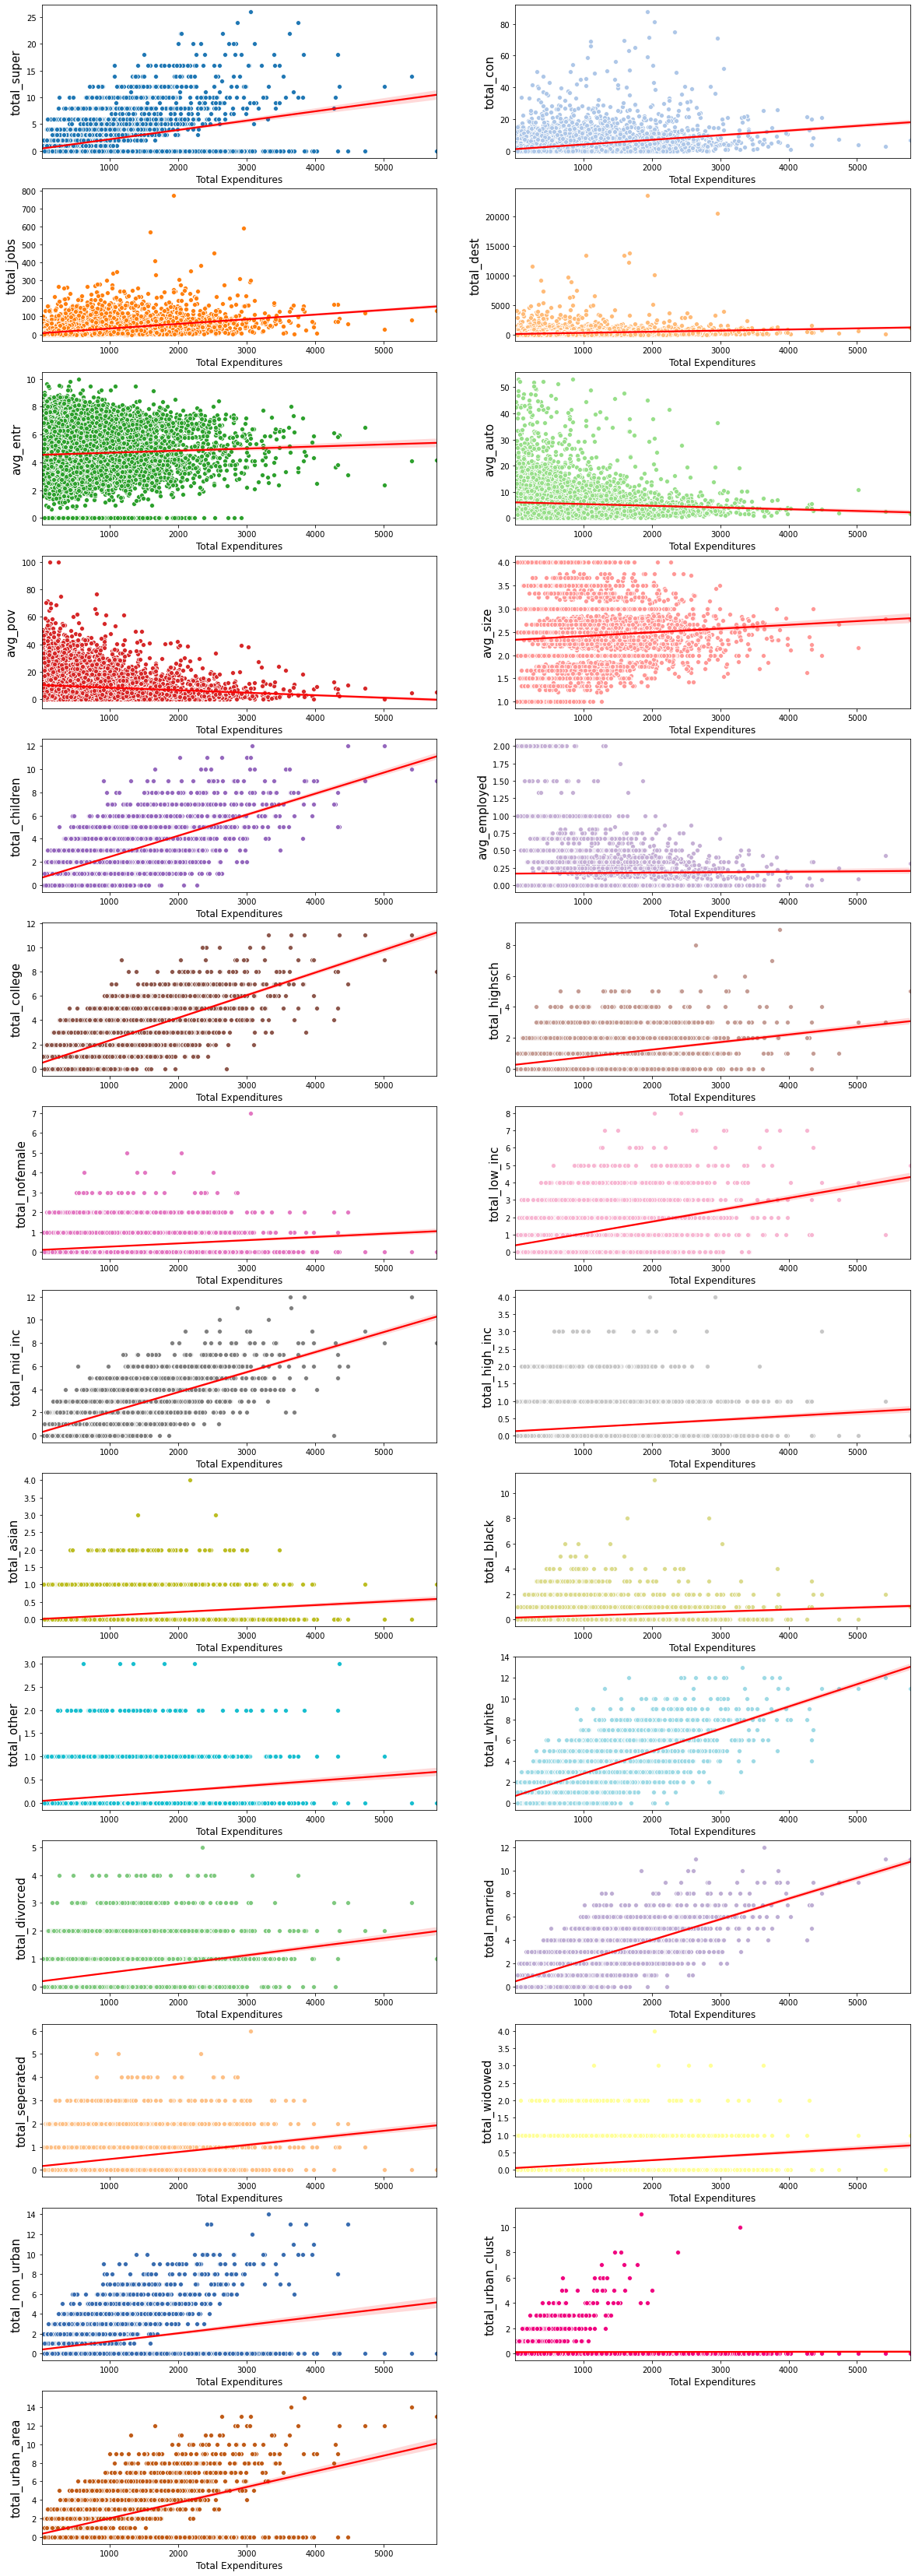

In [1236]:
variables = zip_df.drop(columns = ['total_expend']).columns.tolist()
colors = sns.color_palette(palette = 'tab20') + sns.color_palette(palette = 'Accent')

plt.figure(figsize=(20,60))

i = 1

for var in variables:
    plt.subplot(14, 2, i)
    s = sns.scatterplot(data=zip_df, x="total_expend", y=var, color =colors[i-1])
    r = sns.regplot(data=zip_df, x="total_expend", y=var, scatter=False, color='r')
    s.set_xlabel('Total Expenditures', fontsize = 12)
    s.set_ylabel(var, fontsize = 15)
    i += 1

In [1237]:
zip_df['intercept'] = 1

all = zip_df.drop(columns = ['total_expend']).columns.tolist()

x = zip_df[all]
y = zip_df['total_expend']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_expend   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1010.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:25:52   Log-Likelihood:                -63816.
No. Observations:                8837   AIC:                         1.277e+05
Df Residuals:                    8813   BIC:                         1.278e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
total_super          13.8979      1.709      8.134      0.000      10.549      17.247
total_con            -6.1903      1.254     -4.937      0.000      -8.648      -3.732
total_jobs            0.8954      0.166      5.394      0.000       0.570       1.221
total_dest            0.0325      0.009      3.616      0.000       0.015       0.050
avg_entr             -8.9516      1.755     -5.102      0.000     -12.391      -5.512
avg_auto             -0.6988      0.889     -0.786      0.432      -2.441       1.043
avg_pov              -1.3661      0.445     -3.070      0.002      -2.238      -0.494
avg_size             11.4364      6.458      1.771      0.077      -1.224      24.096
total_children       20.7733      6.187      3.357      0.001       8.645      32.902
avg_employed          2.7515     11.502      0.239      0.811     -19.794      25.297
total_college        73.9560      3.484     21.227      0.000      67.127      80.785
total_highsch        32.7794      4.599      7.128      0.000      23.765      41.794
total_nofemale       13.6329      6.391      2.133      0.033       1.106      26.160
total_low_inc        28.5794      3.919      7.293      0.000      20.898      36.261
total_mid_inc        97.8903      3.801     25.753      0.000      90.439     105.341
total_high_inc       -6.1013      6.258     -0.975      0.330     -18.368       6.165
total_asian          90.8432     10.302      8.818      0.000      70.649     111.038
total_black         -25.1877      5.955     -4.229      0.000     -36.861     -13.514
total_other          35.7996      8.855      4.043      0.000      18.442      53.157
total_white          18.9133      4.156      4.551      0.000      10.767      27.059
total_divorced       15.5154      5.227      2.968      0.003       5.269      25.762
total_married        69.2246      4.492     15.410      0.000      60.419      78.030
total_seperated       7.4405      5.562      1.338      0.181      -3.462      18.343
total_widowed        28.1879      8.100      3.480      0.001      12.310      44.066
total_non_urban      47.1031      2.686     17.539      0.000      41.839      52.368
total_urban_clust    23.8048      5.057      4.708      0.000      13.892      33.717
total_urban_area     49.4604      2.713     18.232      0.000      44.143      54.778
intercept            32.9634     18.740      1.759      0.079      -3.772      69.699
==============================================================================
Omnibus:                     1707.510   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5582.183
Skew:                           0.975   Prob(JB):                         0.00
Kurtosis:                       6.370   Cond. No.                     1.13e+16
======================

In [1238]:
pvalues = pd.DataFrame(model.pvalues, columns =['pvalue']).reset_index().rename(columns={'index':'variable'})
tvalues = pd.DataFrame(model.tvalues, columns =['tvalue']).reset_index().rename(columns={'index':'variable'})
key_vals = pvalues.merge(tvalues, how='inner', on='variable')
key_vals = key_vals[key_vals['pvalue'] < 0.05]
key_vals = key_vals[key_vals['tvalue'] > 0]
sig_vals = key_vals['variable'].tolist()

In [1239]:
zip_df['intercept'] = 1

x = zip_df[sig_vals + ['intercept']]
y = zip_df['total_expend']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_expend   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1349.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:25:52   Log-Likelihood:                -63859.
No. Observations:                8837   AIC:                         1.278e+05
Df Residuals:                    8819   BIC:                         1.279e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
total_super          10.7194      1.621      6.611      0.000       7.541      13.898
total_jobs            0.5289      0.157      3.362      0.001       0.221       0.837
total_dest            0.0141      0.007      1.899      0.058      -0.000       0.029
total_children       13.7768      5.116      2.693      0.007       3.748      23.806
total_college        57.4284      6.649      8.637      0.000      44.394      70.463
total_highsch        15.1419      7.505      2.018      0.044       0.430      29.854
total_nofemale       -6.6886      8.664     -0.772      0.440     -23.672      10.294
total_low_inc        37.9556      8.942      4.244      0.000      20.426      55.485
total_mid_inc       112.9513      8.702     12.981      0.000      95.894     130.008
total_asian         125.6320     13.772      9.123      0.000      98.636     152.628
total_other          65.0171     12.042      5.399      0.000      41.412      88.623
total_white          50.9315      6.307      8.075      0.000      38.568      63.295
total_divorced        7.9750      8.244      0.967      0.333      -8.185      24.135
total_married        66.5808      7.470      8.913      0.000      51.937      81.225
total_widowed        22.2863     11.586      1.924      0.054      -0.425      44.997
total_non_urban      29.5039      6.227      4.738      0.000      17.297      41.711
total_urban_clust     6.0370      8.020      0.753      0.452      -9.684      21.758
total_urban_area     30.3407      6.215      4.882      0.000      18.158      42.524
intercept             5.3247      5.911      0.901      0.368      -6.262      16.911
==============================================================================
Omnibus:                     1709.064   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5598.262
Skew:                           0.975   Prob(JB):                         0.00
Kurtosis:                       6.376   Cond. No.                     1.76e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1240]:
pvalues = pd.DataFrame(model.pvalues, columns =['pvalue']).reset_index().rename(columns={'index':'variable'})
tvalues = pd.DataFrame(model.tvalues, columns =['tvalue']).reset_index().rename(columns={'index':'variable'})
key_vals = pvalues.merge(tvalues, how='inner', on='variable')
key_vals = key_vals[key_vals['pvalue'] < 0.05]
key_vals = key_vals[key_vals['tvalue'] > 0]
final_vals = key_vals['variable'].tolist()
final_vals

zip_df['intercept'] = 1

x = zip_df[final_vals + ['intercept']]
y = zip_df['total_expend']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_expend   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1763.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:25:52   Log-Likelihood:                -63862.
No. Observations:                8837   AIC:                         1.278e+05
Df Residuals:                    8823   BIC:                         1.279e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
total_super         10.6501      1.616      6.592      0.000       7.483      13.817
total_jobs           0.6936      0.126      5.490      0.000       0.446       0.941
total_children      14.7732      4.778      3.092      0.002       5.407      24.140
total_college       68.0197      7.403      9.188      0.000      53.508      82.531
total_highsch       26.4726      8.419      3.144      0.002       9.969      42.976
total_low_inc       38.7775      7.784      4.981      0.000      23.518      54.037
total_mid_inc      112.7882      7.600     14.840      0.000      97.890     127.686
total_asian        124.1838     13.513      9.190      0.000      97.695     150.673
total_other         64.6967     11.643      5.557      0.000      41.874      87.519
total_white         51.9682      5.703      9.113      0.000      40.790      63.147
total_married       58.8706      5.505     10.694      0.000      48.080      69.662
total_non_urban     24.2844      6.004      4.045      0.000      12.516      36.053
total_urban_area    24.9587      6.006      4.156      0.000      13.186      36.732
intercept            5.7623      5.823      0.990      0.322      -5.653      17.178
==============================================================================
Omnibus:                     1705.484   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5588.432
Skew:                           0.973   Prob(JB):                         0.00
Kurtosis:                       6.375   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1241]:
zip_df['intercept'] = 1

x = zip_df[final_vals + ['intercept']]
y = zip_df['total_expend']
x = sm.add_constant(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test)

In [1242]:
plt.figure = 
plt.scatter(predictions.index, predictions)

SyntaxError: invalid syntax (<ipython-input-1242-8c84eedfc34b>, line 1)

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(data = df, x='Bandwidth_GB_Year', y='Tenure',
            scatter_kws={'alpha':0.1, 'color':'salmon'}, line_kws={'color': 'red'})

plt.title('Tenure (Months) vs Bandwidth Per Year (Gigabytes)');